In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [16]:
# Utitlities
import os
import glob

def load_data(image_dir):
    im_list = []
    image_types = ["day", "night"]
    
    for im_type in image_types:
        
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            im = mpimg.imread(file)
            
            if not im is None:
                im_list.append((im, im_type))
    
    return im_list

    
def standarize_image(image):
    standard_image = cv2.resize(image, (1100, 600))
    return standard_image


def encode(label):
    numerical_val = 0
    if label == 'day':
        numerical_val =1 
    return numerical_val

def standarize(image_list):
    standard_list = []
    for item in image_list:
        image = item[0]
        label = item[1]
        
        standarized_image = standarize_image(image)
        binary_label = encode(label)
        
        standard_list.append((standarized_image, label))
    return standard_list

In [17]:
# direcories
image_dir_train = "day_night_images/training/"
image_dir_test = "day_night_images/test/"


In [18]:
# Load the data 
IMAGE_LIST = load_data(image_dir_train)
print(IMAGE_LIST)

[(array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [213, 206, 222],
        [230, 221, 238],
        [248, 239, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [189, 182, 198],
        [199, 192, 208],
        [212, 205, 221]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [224, 220, 235],
        [229, 225, 240],
        [229, 225, 240]],

       ...,

       [[ 56,  68,  82],
        [ 56,  68,  82],
        [ 57,  69,  83],
        ...,
        [102,  90,  78],
        [102,  90,  78],
        [101,  89,  77]],

       [[ 55,  69,  82],
        [ 55,  69,  82],
        [ 56,  70,  83],
        ...,
        [101,  91,  81],
        [100,  90,  80],
        [100,  90,  80]],

       [[ 54,  68,  81],
        [ 55,  69,  82],
        [ 55,  69,  82],
        ...,
        [101,  91,  81],
        [100,  90,  80],
        [100,  90,  80

In [12]:
# Visualize the image 

image_index = 0 
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]

print(selected_image.shape)
print(selected_label)


(700, 1280, 3)
day


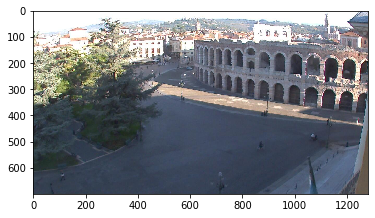

In [13]:
plt.imshow(selected_image)

In [14]:
# Standarization

In [19]:
STANDARIZED_LIST = standarize(IMAGE_LIST)

(600, 1100, 3)
day


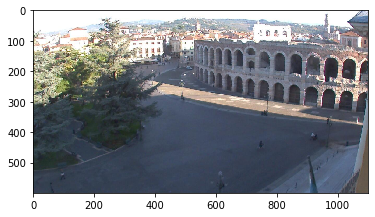

In [20]:
# Visualize the image 

image_index = 0 
selected_image_s = STANDARIZED_LIST[image_index][0]
selected_label_s = STANDARIZED_LIST[image_index][1]

print(selected_image_s.shape)
print(selected_label_s)
plt.imshow(selected_image_s)

In [21]:
# Feature Extraction 
# Using Avereage brightness


Image Label is day


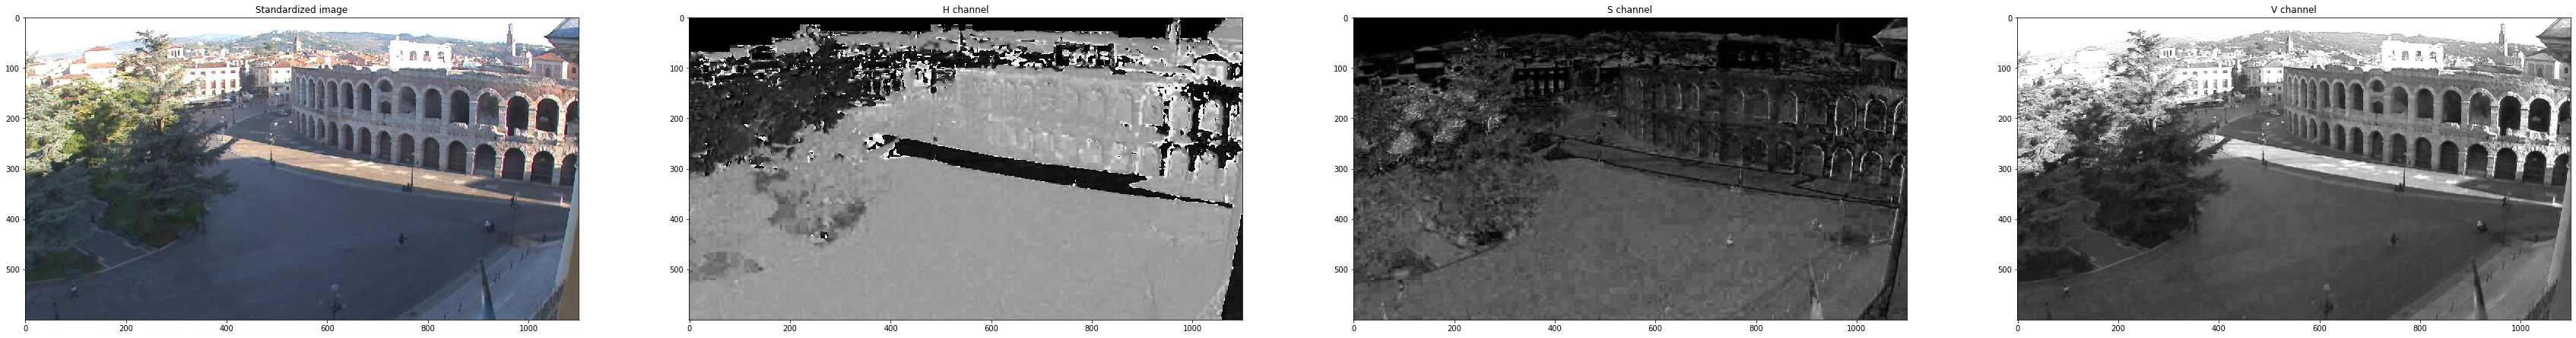

In [33]:
# Convert to HSC
image_num = 0 
test_im = STANDARIZED_LIST[image_num][0]
test_label = STANDARIZED_LIST[image_num][1]

hsv_ = cv2.cvtColor(test_im, cv2.COLOR_RGB2HSV)

print("Image Label is {}".format(str(test_label)))

# HSV channel 
h = hsv_[:, :, 0]
s = hsv_[:, :, 1]
v = hsv_[:, :, 2]


# Plots 
f, (ax1, ax2, ax3, ax4)  = plt.subplots(1 , 4, figsize= (60, 15))

ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

In [34]:
def average_bright(rgb_image):
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    sum_brightness =np.sum(hsv[:,:, 2])
    area = 600*1100.0
    avg = sum_brightness /area
    return avg

Avg brightness: 128.06237424242426


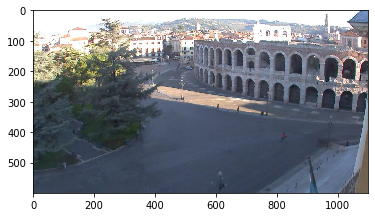

In [37]:
image_num = 100
test_im = STANDARIZED_LIST[image_num][0]

avg = average_bright(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

In [44]:
def estimate_label(rgb_image):
    
    avg = average_bright(rgb_image)
    predicted_label = 0
    
    threshold = 100
    if(avg > threshold):
        predicted_label = 1    
    return predicted_label

In [45]:
# TEST DATA


import random

TEST_IMAGE_LIST = load_data(image_dir_test)

STANDARDIZED_TEST_LIST = standarize(TEST_IMAGE_LIST)

random.shuffle(STANDARDIZED_TEST_LIST)



In [46]:
def get_miss_class_image(test_images):
    missclassified_images = []
    for image in test_images:
        im = image[0]
        true_label = image[1]
        
        pred_label = estimate_label(im)
        if pred_label != true_label:
            missclassified_images.append((im, pred_label, true_label))
        
        return missclassified_images

In [47]:
MISCLASSIFIED = get_miss_class_image(STANDARDIZED_TEST_LIST)

total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.99375
Number of misclassified images = 1 out of 160
